# **Hand Written Digit Prediction - Classification Analysis**

# **Objective**

Predict the hand written digits using the dataset consisting of images of digits.

# **Data Source**

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays od grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.

# **Import Library**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Data**

In [24]:
from sklearn.datasets import load_digits
df = load_digits()

In [27]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

# **Data Visualization**

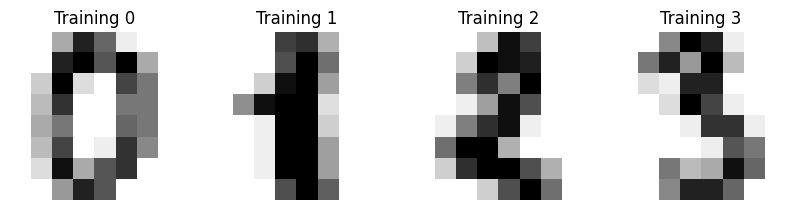

In [31]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training %i"% label)

# **Data Preprocessing**

data flattening

In [32]:
df.images.shape

(1797, 8, 8)

In [34]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [35]:
df.images[0].shape

(8, 8)

In [37]:
len(df.images)

1797

In [49]:
n_samples = len(df.images)
data = df.images.reshape(n_samples, -1)

In [50]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [51]:
data[0].shape

(64,)

In [43]:
data.shape

(1797, 64)

Scaling Image Data

In [52]:
data.min()

0.0

In [53]:
data.max()

16.0

In [54]:
data = data/16

In [55]:
data.min()
data.max()

1.0

In [56]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split**

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,df.target, test_size=0.3)

In [58]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [68]:
x_test

array([[0.    , 0.    , 0.0625, ..., 0.0625, 0.    , 0.    ],
       [0.    , 0.    , 0.25  , ..., 0.75  , 0.0625, 0.    ],
       [0.    , 0.    , 0.1875, ..., 0.9375, 0.4375, 0.    ],
       ...,
       [0.    , 0.0625, 0.625 , ..., 0.3125, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.1875, 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

# **Modeling**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [61]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# **Prediction**

In [62]:
y_pred = rf.predict(x_test)

In [63]:
y_pred

array([8, 9, 6, 9, 1, 9, 1, 1, 9, 4, 7, 9, 6, 3, 3, 1, 6, 9, 7, 3, 3, 0,
       0, 2, 8, 1, 8, 9, 2, 1, 3, 0, 9, 2, 5, 4, 6, 4, 8, 3, 2, 0, 2, 2,
       4, 1, 9, 1, 0, 6, 4, 9, 9, 8, 4, 3, 1, 1, 1, 7, 1, 6, 0, 9, 5, 6,
       2, 2, 6, 0, 8, 9, 1, 0, 1, 3, 2, 4, 2, 8, 3, 1, 2, 8, 9, 6, 7, 9,
       7, 9, 4, 4, 7, 9, 4, 5, 3, 6, 4, 1, 3, 9, 2, 8, 7, 8, 7, 3, 6, 0,
       3, 9, 6, 6, 0, 5, 4, 4, 2, 4, 0, 5, 5, 3, 9, 2, 2, 5, 0, 5, 5, 0,
       2, 0, 4, 2, 3, 5, 4, 1, 8, 7, 2, 5, 7, 9, 1, 7, 6, 3, 1, 7, 7, 3,
       4, 9, 9, 7, 3, 7, 8, 0, 3, 0, 0, 7, 9, 1, 8, 5, 0, 7, 5, 3, 0, 2,
       4, 3, 1, 9, 5, 1, 9, 4, 0, 9, 0, 4, 6, 4, 6, 6, 7, 7, 8, 5, 1, 4,
       5, 9, 8, 7, 6, 2, 2, 5, 6, 3, 1, 1, 2, 7, 0, 0, 3, 8, 4, 6, 7, 4,
       6, 2, 7, 5, 3, 1, 3, 6, 5, 7, 5, 9, 8, 7, 0, 6, 2, 1, 2, 3, 9, 5,
       8, 7, 3, 8, 8, 1, 2, 4, 7, 0, 6, 1, 5, 3, 9, 8, 7, 7, 2, 1, 3, 6,
       4, 7, 0, 0, 9, 3, 8, 5, 7, 8, 3, 2, 6, 1, 1, 5, 1, 7, 8, 4, 6, 1,
       7, 9, 7, 3, 5, 6, 0, 5, 4, 7, 4, 2, 0, 3, 5,

# **Model Accuracy**

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [65]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 57,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1, 47,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 53,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  1, 45,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 53]])

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.93      1.00      0.96        53
           2       0.98      1.00      0.99        62
           3       0.98      0.95      0.97        60
           4       0.96      0.96      0.96        52
           5       0.96      0.98      0.97        48
           6       1.00      0.96      0.98        52
           7       0.96      0.98      0.97        54
           8       0.94      0.90      0.92        50
           9       0.96      0.95      0.95        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [73]:
accuracy_score(y_test, y_pred)

0.9666666666666667


# **Explaination**

Classified the hand written digits using sklearn digits dataset with accuracy of 96%.